Check Python version

In [1]:
!python --version

Python 3.9.12


Import libraries

In [2]:
import json
import yaml
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### **Extract Data**

In [3]:
# Local directory
# data_dir = "../datasets/retail"
# file_name = "air_passengers"
# file_path = f"{data_dir}/{file_name}.csv"

# Through online GitHub
file_path = "https://github.com/ourownstory/neuralprophet-data/raw/main/datasets/air_passengers.csv"

In [4]:
train_df = pd.read_csv(file_path)

In [5]:
train_df.shape

(144, 2)

In [6]:
train_df.columns

Index(['ds', 'y'], dtype='object')

In [7]:
train_df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [8]:
train_df.tail()

,ds,y
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


Change 'y' to float

In [9]:
train_df["y"] = train_df["y"].astype(float)

In [10]:
train_df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


Plot graph

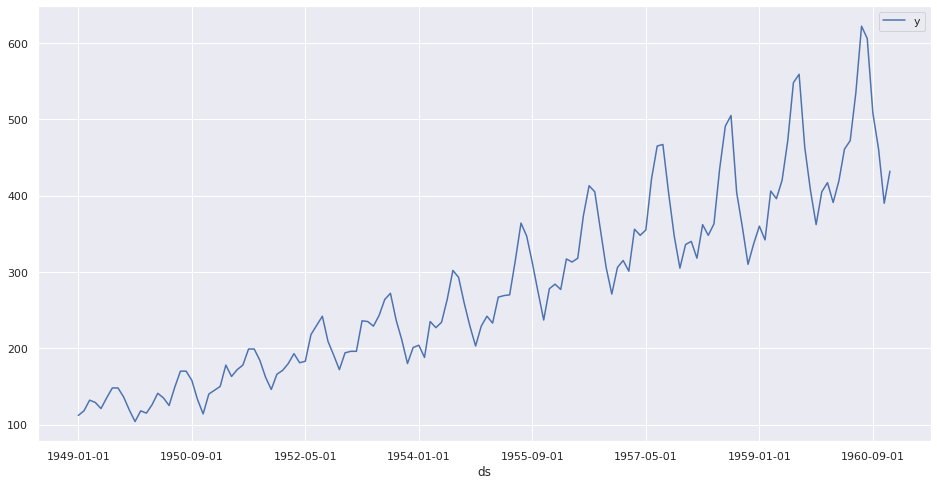

In [11]:
figsize = (16, 8)
train_df.set_index("ds").plot(figsize=figsize);

### **Train API**

Train data: convert df to list-of-list

In [12]:
train_data = []

In [13]:
for value in train_df.values:
    train_data.append(list(value))

In [14]:
train_data[:10]

[['1949-01-01', 112.0],
 ['1949-02-01', 118.0],
 ['1949-03-01', 132.0],
 ['1949-04-01', 129.0],
 ['1949-05-01', 121.0],
 ['1949-06-01', 135.0],
 ['1949-07-01', 148.0],
 ['1949-08-01', 148.0],
 ['1949-09-01', 136.0],
 ['1949-10-01', 119.0]]

Custom Model Request (optional)

In [15]:
custom_model_request_dict = {
    'type': 'meta_wa',
    'score': ['smape', 'mape'],
    'param': {
        'base_models': [
            {'type': 'darts_autoarima'},
            {'type': 'darts_autotheta'},
            {'type': 'darts_autoets'},
            {'type': 'stats_autotheta'},
        ]
    }
}

In [16]:
custom_model_request = json.dumps(custom_model_request_dict)

Train API JSON Payload

In [17]:
api_json = {
    'data': train_data,
    # 'model': custom_model_request,  # TODO: custom_model_request_dict returns empty JSON output
}

Build URL

In [18]:
with open('url.yaml', 'r') as file:
    url_dict = yaml.safe_load(file)

In [19]:
# URL to our SYBIL AWS service
protocol = url_dict["protocol"]
host = url_dict["host"]
port = url_dict["port"]
endpoint = "train"

url = "%s://%s:%s/%s" % (protocol, host, str(port), endpoint)

Call endpoint, receive response JSON, write to output file

In [20]:
%%time
# TODO: gain a accredited cert and remove verify=False
response = requests.post(url, json=api_json, verify=False)

/home/studio-lab-user/.conda/envs/dev/lib/python3.9/site-packages/urllib3/connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'sybil.tempor.ai'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


CPU times: user 17.4 ms, sys: 0 ns, total: 17.4 ms
Wall time: 3.63 s


In [21]:
train_json_out = response.json()  # dict output
# train_json_out = json.dumps(response.json())  # str output
# train_json_out = json.dumps(response.json(), indent=4)  # str output w tabs

In [22]:
train_json_out

{'model': 'AgEBCKeiAACgogAAUGYAABgAAABFZgAA7QkAAD+AAGVsc02TjG8odJOMjG1vbnQUcnQpdF+MdGVlk4xkbR+UeWGUcoFffWFyYmRilGSUlHlujElBkyiUc25hZZRkLh8uCmQoaHRvdJR5bXlplE5KlF+UZIZwI2hoKAWUdHBtYR9jdG6TYgECUpT/dDBoPIkDS4ZIjJRlaGFpjEkpBTFoSx6UlHKUS5R9WZSFZUtolG1haGGBaG0olEuHlEv//wgA4HcAH2h0dpRhaIZtlHNtlHFyTmxtTm9fbhV2c4xfdHNfcGGJH192lGVyaRd1dpRzdHaUZWlpF3R2lF+IbJRjC0RSX3NzGnROZXJwbmVkZWyUKGJodIlzdV9OdGyMbmF0c2A1E192lF9jZWFkEG9zKACUaGiMZXJmwAofdG1mcmWMb20HlCgDYQXmX2+DA6xic5RAUpReaKyUZV0flGl0cweUS1KUq1P9VVbc/MoLXlpc17GUXWiHD0K/5akf4nXo1wyINiTBB7R96/V3ZtUBBndQ3EjtbkKlhzYGgDQfiA8+sw/DSvURNVlCvS9iZcDA7krgvzfbVnvFXLBMHKMf5M0VNCiWViYDewDOaMCW9gVkOC6GbIuMsIHKCsrPu+UfnUpCAcfVDP9s7dvuIwtYSEgr41IKVzaPmTNte0p89PMfwdI5VxXTMBzxXkrLZ7veeDkjLc0Bnf3+IAttd5oPuKcfq11bNJtwvbkw1T1tt1KJw5g6HjMGOzey8LbiXW8V0E4fJKJJ5XftMxlSir7u/4Z1YmWUlEuJkEs5UbiuZBI57IYfh6Ix7VvEjnfOB4P45W7E6FKGXR7NyxCi8WhFaXHY+W0fvAp0CFvx0M4R2z97JquF4+r1GNbz7LERBTyFhR9cerUfO5PTpYLcCcF5M8rjyzSBH6ZkIGHqkxGwM9YRKLWYVowfbMx9MODBS9KqJlNJHsOOeR435HDR0ZRvBG10BmhoA

### **Forecast API**

Forecast Dates: predict the next 2 years of air passenger data (1961-1962)

In [23]:
dates = [
    "1961-01-01", "1961-02-01", "1961-03-01", "1961-04-01", "1961-05-01", "1961-06-01",
    "1961-07-01", "1961-08-01", "1961-09-01", "1961-10-01", "1961-11-01", "1961-12-01",
    "1962-01-01", "1962-02-01", "1962-03-01", "1962-04-01", "1962-05-01", "1962-06-01",
    "1962-07-01", "1962-08-01", "1962-09-01", "1962-10-01", "1962-11-01", "1962-12-01",
]

Model from Train API

In [24]:
model = train_json_out["model"]

Forecast API JSON Payload

In [25]:
api_json = {
    'model': model,
    'predicts': dates
}

Build URL (same as train except for the endpoint)

In [26]:
endpoint = "forecast"

url = "%s://%s:%s/%s" % (protocol, host, str(port), endpoint)

Call endpoint, receive response JSON, write to output file

In [27]:
%%time
# TODO: gain a accredited cert and remove verify=False
response = requests.post(url, json=api_json, verify=False)

CPU times: user 13.8 ms, sys: 1.21 ms, total: 15.1 ms
Wall time: 86.9 ms


/home/studio-lab-user/.conda/envs/dev/lib/python3.9/site-packages/urllib3/connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'sybil.tempor.ai'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [28]:
forecast_json_out = response.json()  # dict output
# forecast_json_out = json.dumps(response.json())  # str output
# forecast_json_out = json.dumps(response.json(), indent=4)  # str output w tabs

In [29]:
forecast_json_out

{'data': [410.648018323001,
  359.22045206110135,
  396.9376319291515,
  408.5850783345507,
  398.0236436296759,
  459.43406753847927,
  445.12396956661934,
  455.8480911623816,
  513.2163275504608,
  575.5891907072628,
  578.0649532874502,
  497.6966732774506,
  442.0795726116245,
  389.6633152788227,
  428.1836927127506,
  439.92095273582936,
  429.17547315270315,
  491.65001580926275,
  477.0119810264976,
  487.7327215155152,
  546.1918477057344,
  609.4639650224614,
  611.8701797786096,
  530.2600406898707]}

Combine forecast dates and output

In [30]:
forecast_data = list(zip(dates, forecast_json_out["data"]))
forecast_df = pd.DataFrame(forecast_data, columns = ["ds", "y"])

In [31]:
forecast_df.shape

(24, 2)

In [32]:
forecast_df.columns

Index(['ds', 'y'], dtype='object')

In [33]:
forecast_df.head()

,ds,y
0,1961-01-01,410.648018
1,1961-02-01,359.220452
2,1961-03-01,396.937632
3,1961-04-01,408.585078
4,1961-05-01,398.023644


In [34]:
forecast_df.tail()

,ds,y
19,1962-08-01,487.732722
20,1962-09-01,546.191848
21,1962-10-01,609.463965
22,1962-11-01,611.870180
23,1962-12-01,530.260041


Plot train and forecast side-by-side

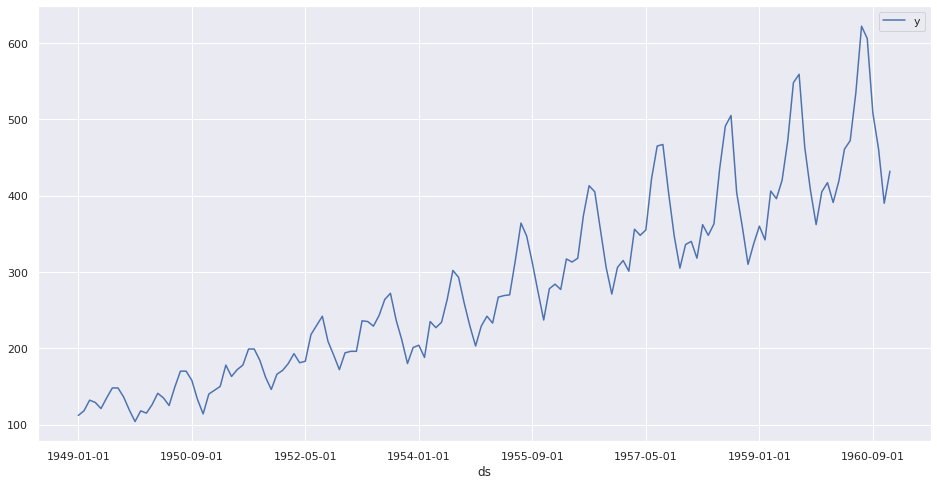

In [35]:
train_df["color"] = "b"
train_df.set_index("ds").plot(figsize=figsize, color=train_df["color"]);

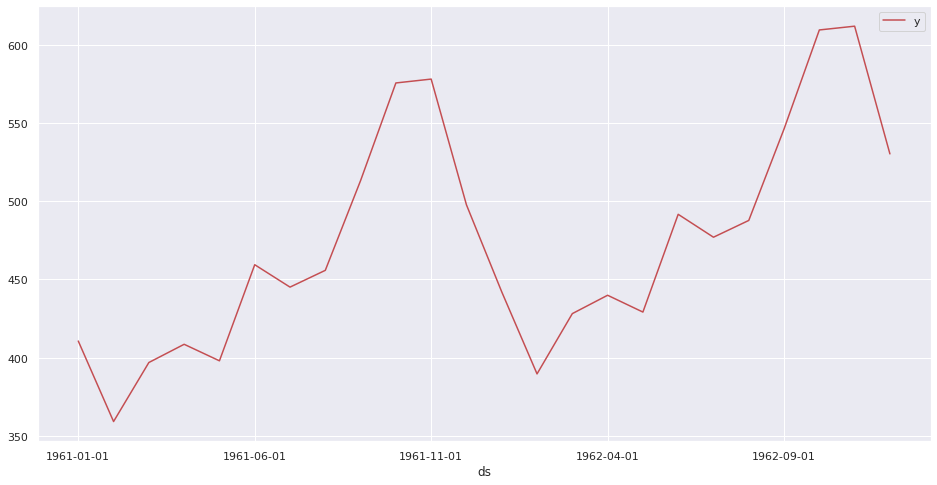

In [36]:
forecast_df["color"] = "r"
forecast_df.set_index("ds").plot(figsize=figsize, color=forecast_df["color"]);

Combine train and test sets

In [37]:
df = pd.concat([train_df, forecast_df]).reset_index(drop=True)

In [38]:
df.shape

(168, 3)

In [39]:
df.head()

,ds,y,color
0,1949-01-01,112.0,b
1,1949-02-01,118.0,b
2,1949-03-01,132.0,b
3,1949-04-01,129.0,b
4,1949-05-01,121.0,b


In [40]:
df.tail()

,ds,y,color
163,1962-08-01,487.732722,r
164,1962-09-01,546.191848,r
165,1962-10-01,609.463965,r
166,1962-11-01,611.870180,r
167,1962-12-01,530.260041,r


Plot combined train and test sets with the vertical black line as the cut-off

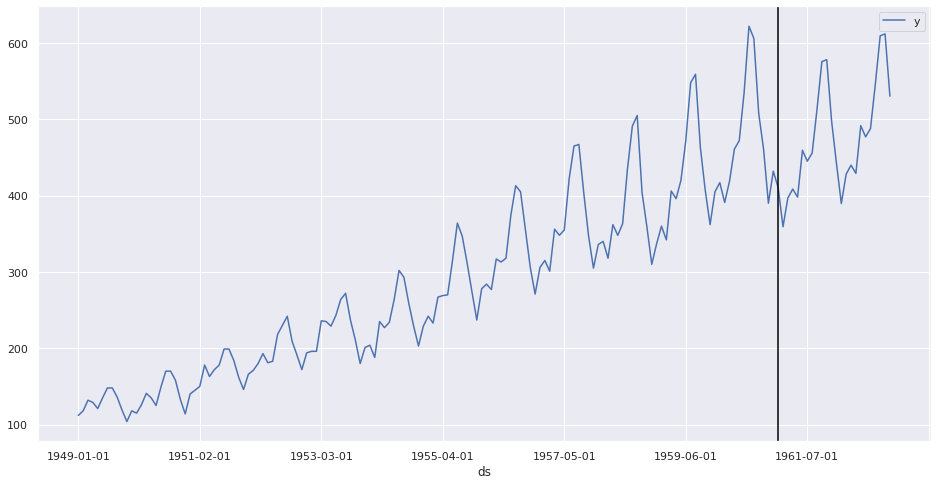

In [41]:
df.set_index("ds").plot(figsize=figsize, color=df["color"])
plt.axvline(x=len(train_df), color='black', label ='Train/Test set cut-off')
plt.show();